In [1]:
import pandas as pd 
df_house=pd.read_csv('data/AmesHousing.csv')
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
df_house.isna().sum().sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
                  ... 
Roof Style           0
Year Remod/Add       0
Year Built           0
Overall Cond         0
Exter Cond           0
Length: 82, dtype: int64

In [5]:
na_series = df_house.isna().sum()
data_len = len(df_house) * 0.05
na_series[(na_series < data_len) & (na_series != 0)]

Mas Vnr Area      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

In [7]:
col_names = list(na_series[(na_series <= data_len) & (na_series != 0)].keys())

In [11]:
df_house = df_house.dropna(subset=col_names)
df_house.shape

(2821, 82)

In [13]:
object_cols = list(df_house.select_dtypes(include='object').columns)

In [15]:
X_cat=df_house[object_cols]
X_cat

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [17]:
X_nums = df_house.drop(object_cols, axis=1)
X_nums

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


In [19]:
y = X_nums['SalePrice'].values.reshape(-1, 1)
X_nums.drop('SalePrice', inplace=True, axis=1)

In [21]:
from sklearn.model_selection import train_test_split

X_train_cat, X_test_cat, y_train_cat, y_test_cat =train_test_split(X_cat, y, test_size=0.2, random_state=42)
X_train_nums, X_test_nums, y_train_nums, y_test_nums =train_test_split(X_nums, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.impute import SimpleImputer

imp_cat=SimpleImputer(strategy="most_frequent")
X_train_cat=imp_cat.fit_transform(X_train_cat)
X_test_cat=imp_cat.fit_transform(X_test_cat)

In [25]:
imp_num=SimpleImputer()
X_train_nums=imp_num.fit_transform(X_train_nums)
X_test_nums=imp_num.fit_transform(X_test_nums)

In [27]:
import numpy as np

X_train = np.append(X_train_nums, X_train_cat, axis=1)
X_train

array([[963.0, 916403010.0, 20.0, ..., 'Shed', 'WD ', 'Normal'],
       [2684.0, 903235020.0, 30.0, ..., 'Shed', 'WD ', 'Normal'],
       [2874.0, 910200060.0, 50.0, ..., 'Shed', 'WD ', 'Normal'],
       ...,
       [1172.0, 533215080.0, 120.0, ..., 'Shed', 'CWD', 'Abnorml'],
       [1346.0, 903233080.0, 50.0, ..., 'Shed', 'WD ', 'Normal'],
       [893.0, 908186080.0, 180.0, ..., 'Shed', 'WD ', 'Normal']],
      dtype=object)

In [29]:
X_test = np.append(X_test_nums, X_test_cat, axis=1)
X_test

array([[1132.0, 531363060.0, 20.0, ..., 'Shed', 'WD ', 'Normal'],
       [2433.0, 528235130.0, 60.0, ..., 'Shed', 'WD ', 'Normal'],
       [794.0, 905475160.0, 20.0, ..., 'Shed', 'WD ', 'Normal'],
       ...,
       [2413.0, 528218080.0, 60.0, ..., 'Shed', 'New', 'Partial'],
       [967.0, 916460110.0, 60.0, ..., 'Shed', 'WD ', 'Abnorml'],
       [1049.0, 527454120.0, 120.0, ..., 'Shed', 'WD ', 'Normal']],
      dtype=object)

In [34]:
from sklearn.pipeline import Pipeline
import pandas as pd

df_music = pd.read_csv('data/music_clean.csv')
df_music = df_music.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
# df_music['genre'] = np.where(df_music['genre']=='Rock', 1, 0)

In [36]:
X=df_music.drop('genre',axis=1).values
y=df_music['genre'].values

In [38]:
# Bir ardışık düzende, son adım hariç her adımın bir dönüştürücü 
# olması gerektiği unutulmamalıdır

from sklearn.linear_model import LogisticRegression
steps = [
    ('imputation', SimpleImputer()),
    ('logistic_regression', LogisticRegression())
]

pipeline = Pipeline(steps=steps)

X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

/home/aziz/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.775

In [40]:
import pandas as pd

df_music = pd.read_csv('data/music_genre.csv')

df_music.describe().T

,count,mean,std,min,25%,50%,75%,max
instance_id,44996.0,55883.823784,20728.799250,20002.000000,37999.75000,55856.500000,73854.50000,91759.000
popularity,44996.0,44.261112,15.556250,0.000000,34.00000,45.000000,56.00000,99.000
acousticness,44996.0,0.306620,0.341413,0.000000,0.02010,0.145000,0.55100,0.996
danceability,44996.0,0.558553,0.178870,0.059600,0.44200,0.568000,0.68700,0.986
duration_ms,44996.0,221163.902236,127706.510819,-1.000000,174706.50000,219448.500000,268630.25000,4497994.000
energy,44996.0,0.599551,0.264546,0.000792,0.43200,0.642000,0.81600,0.999
instrumentalness,44996.0,0.181912,0.325904,0.000000,0.00000,0.000159,0.15500,0.996
liveness,44996.0,0.193953,0.161733,0.009670,0.09690,0.126000,0.24400,1.000
loudness,44996.0,-9.136920,6.157838,-47.046000,-10.86000,-7.283000,-5.17600,3.744
speechiness,44996.0,0.093810,0.101488,0.022300,0.03610,0.048900,0.09890,0.942


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


X = df_music.drop('music_genre', axis=1).values
y = df_music['music_genre'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(np.mean(X), np.std(X))

print(np.mean(X_train_scaled), np.std(X_train_scaled))

23100.432767763512 72094.37978367604
-2.132128274398108e-15 1.000000000000005


In [44]:
# Scaling in a pipeline

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
]

pipeline = Pipeline(steps)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)

knn_scaled.score(X_test, y_test)

0.48088888888888887

In [46]:
# Comparing performance using unscaled data

knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.1272222222222222

In [53]:
from sklearn.model_selection import GridSearchCV
import numpy as np

steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]

pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors" : np.arange(1, 50)}

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

(cv.best_score_, cv.best_params_)

(0.9287500000000002, {'knn__n_neighbors': 2})

{'whiskers': [<matplotlib.lines.Line2D at 0x77a92c480a40>,
 'caps': [<matplotlib.lines.Line2D at 0x77a92c4810a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x77a92c4807a0>,
 'medians': [<matplotlib.lines.Line2D at 0x77a92c4816a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x77a92c4819a0>,
 'means': []}

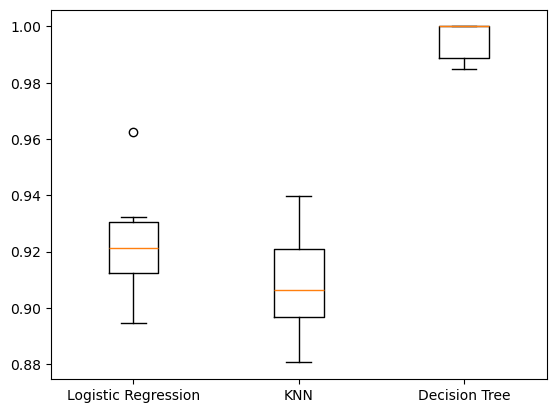

In [51]:
# Sınıflandırma modellerinin değerlendirilmesi

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

df_music = pd.read_csv("data/music_clean.csv")

X = df_music.drop('genre', axis=1).values
y = df_music['genre'].values

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

models = {
    "Logistic Regression" : LogisticRegression(), 
    "KNN": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier() 
}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=True, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())

In [55]:
# test performance

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} Test Set Accuracy : {test_score} ")

Logistic Regression Test Set Accuracy : 0.86 
KNN Test Set Accuracy : 0.86 
Decision Tree Test Set Accuracy : 0.975 
